<a href="https://colab.research.google.com/github/bithi-6535/bithi-6535/blob/main/linear_and_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/book_sales.csv",
               index_col='Date',parse_dates=['Date'],).drop('Paperback',axis=1)


In [ ]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


from matplotlib import pyplot as plt
_df_0['Hardcover'].plot(kind='hist', bins=20, title='Hardcover')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Hardcover'].plot(kind='line', figsize=(8, 4), title='Hardcover')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import numpy as np

df['Time']= np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


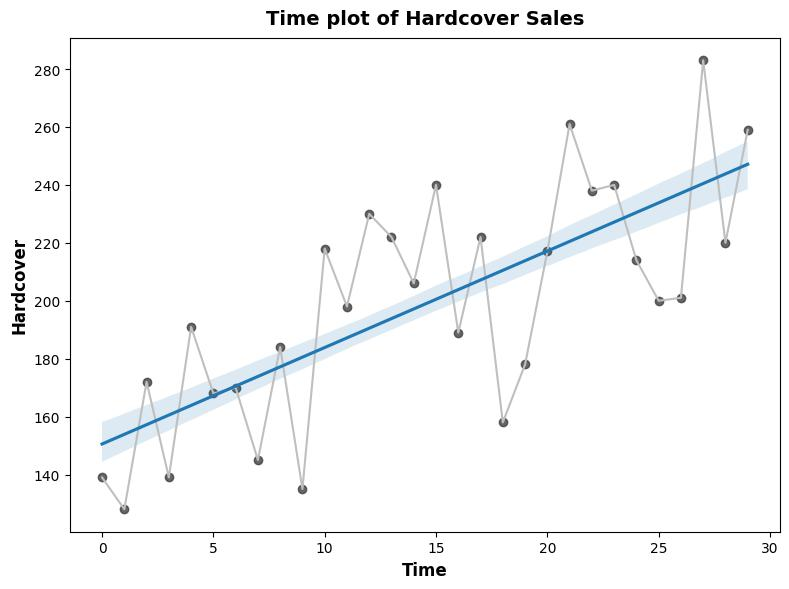

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",autolayout=True, figsize=(8,6),titlesize=18,
       titleweight='bold',)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",
       titlesize=14,titlepad=10,)
%config InlineBackend.figure_format='jpeg'
fig,ax=plt.subplots()
ax.plot('Time','Hardcover', data=df, color='0.75',)
ax=sns.regplot(x='Time',y='Hardcover',data=df,ci=60,
               scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of Hardcover Sales')
plt.show()


In [ ]:
df['Lag_1']=df['Hardcover'].shift(1)
df=df.reindex(columns=['Hardcover','Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


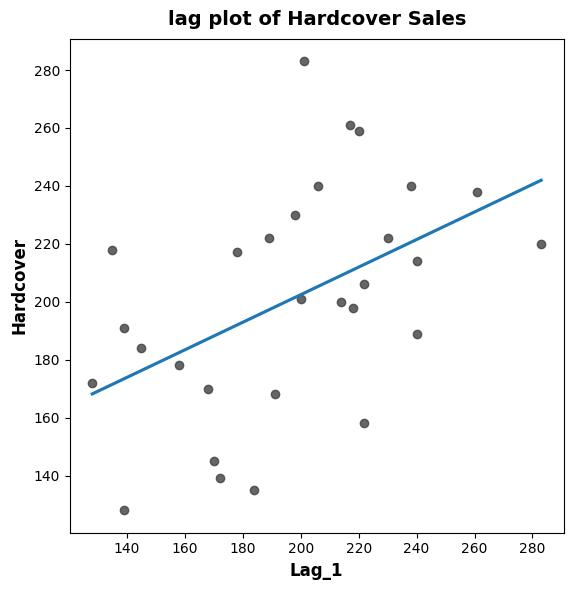

In [ ]:
df.fig,ax=plt.subplots()
ax=sns.regplot(x='Lag_1',y='Hardcover', data=df, ci=None,
               scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('lag plot of Hardcover Sales');

In [ ]:
from warnings import simplefilter
import matplotlib.pyplot as plt
simplefilter("ignore") #ingore warnings to cln outcells

plt.rc("figure",autolayout=True, figsize=(8,6))
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",
       titlesize=14,titlepad=10)
plot_params=dict(color="0.75", style=".-",markeredgecolor="0.25",
                 markerfacecolor="0.25", legend=False,)
%config InlineBackend.figure_format='retina'

tunnel=pd.read_csv("/content/drive/MyDrive/tunnel.csv", parse_dates=["Day"])
tunnel=tunnel.set_index("Day")
tunnel=tunnel.to_period()
tunnel.head()


,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [ ]:
df=tunnel.copy()
df['Time']=np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


Text(0.5, 1.0, 'Time plot for Tunnel traffic')

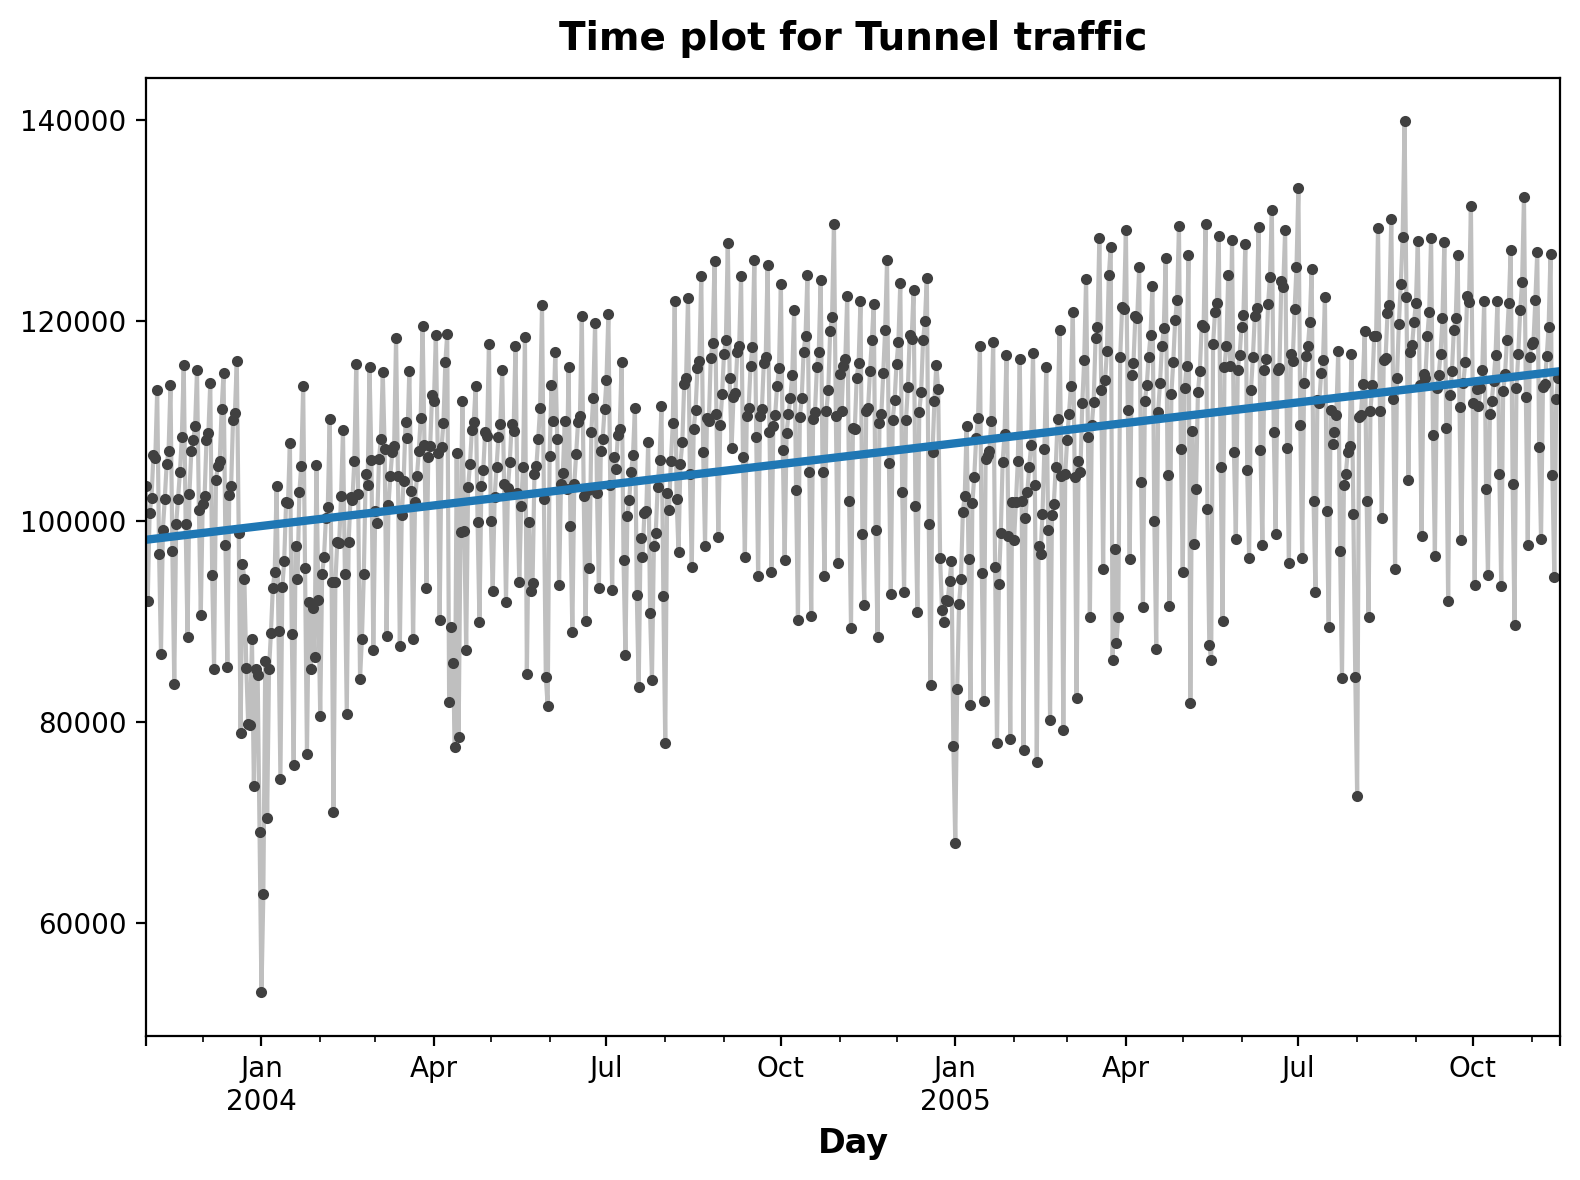

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
#traing data
X=df.loc[:, ['Time']]
y=df.loc[:, 'NumVehicles']
model=LinearRegression()
model.fit(X,y)

y_pred=pd.Series(model.predict(X), index = X.index)
ax=y.plot(**plot_params)
ax=y_pred.plot(ax=ax,linewidth=3)
ax.set_title('Time plot for Tunnel traffic')


In [ ]:
df['Lag_1']=df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [ ]:
x=df.loc[:,['Lag_1']]
x.dropna(inplace=True)
y=df.loc[:,'NumVehicles']
y,x=y.align(x,join='inner')
model=LinearRegression()
model.fit(x,y)
y_pred=pd.Series(model.predict(x), index=x.index)


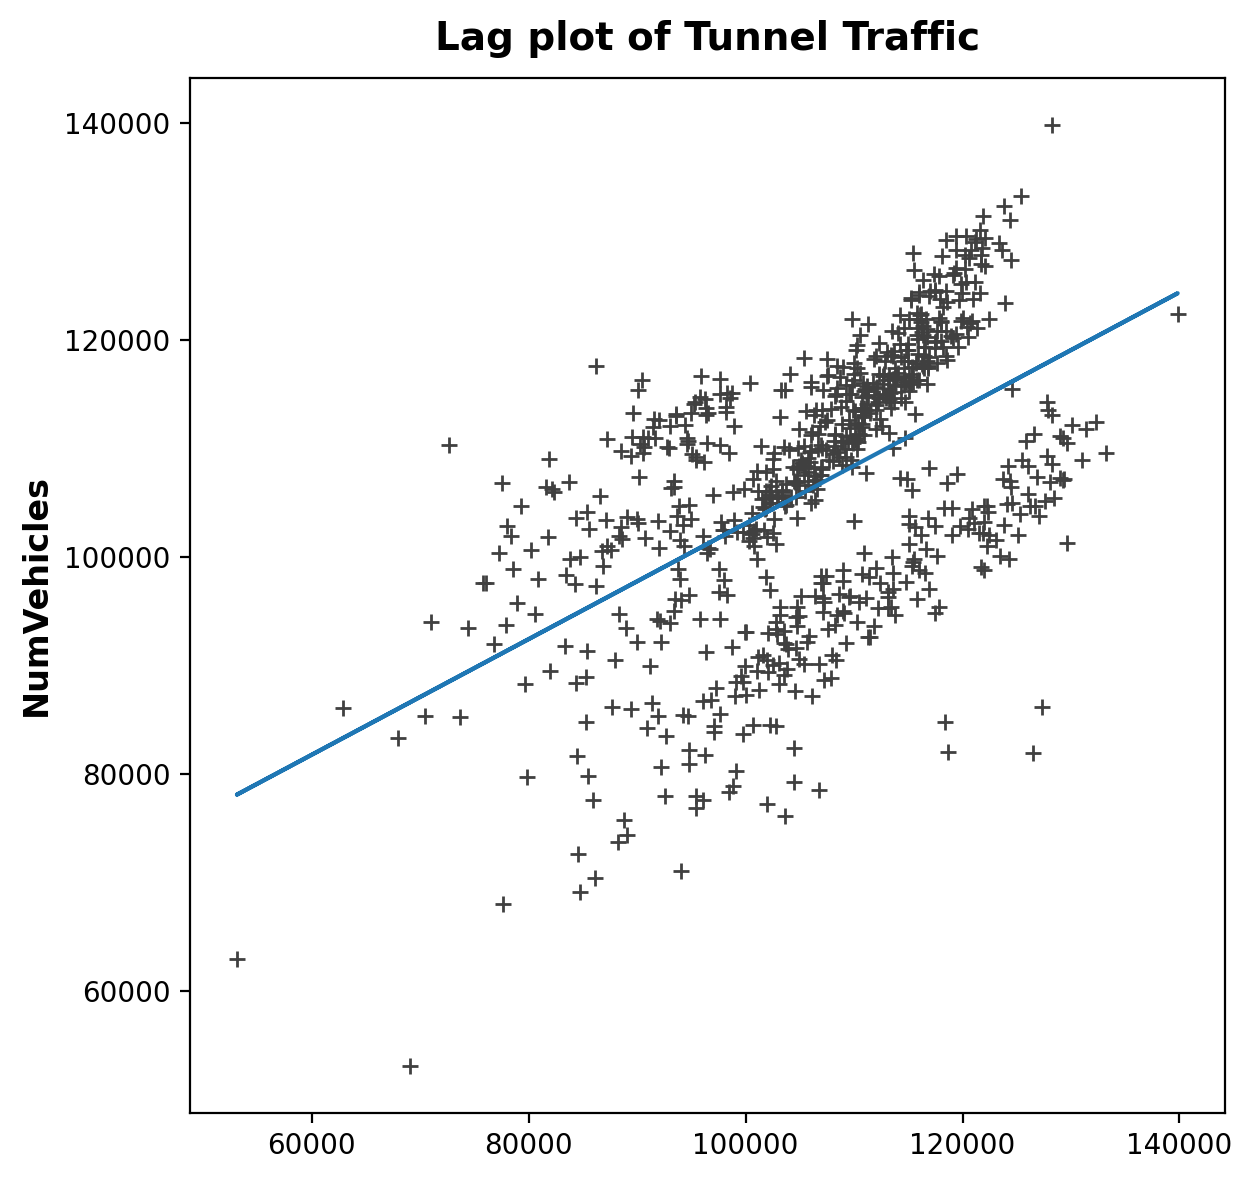

In [ ]:
fig,ax=plt.subplots()
ax.plot(x['Lag_1'], y,'+',color='0.25')
ax.plot(x['Lag_1'],y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_title('Lag plot of Tunnel Traffic');